# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


**Importing all the necessary libraries and the MNSIT dataset from Keras.**

*   MNIST dataset has a training set of 60,000 examples, and a test set of 10,000 examples.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

**Loading the MNIST dataset into Train Dataset and Test Dataset**



In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


**Printing the shape of the input data and Displaying the First image using MATPLOTLIB**

(60000, 28, 28)


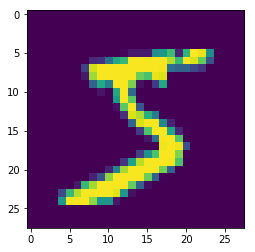

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshaping of the images in the dataset**

The dataset consists images of dimension 28x28 which is hard to accomodate in a multilayer neural network thus we convert the images using ***reshape()*** funtion

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

The pixel value of any cell can range from 0-255, just to normalize it we are dividing each cell value by 255. So, max and min value will range between 0-1 for easier calculation

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

First 10 actual output from the training data set

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

**One Hot Encoding is performed**

Converting the output into one hot encoded vectors for both Train dataset and Test dataset

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Printing the output of the first 10 data after ***One Hot Encoding***

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Defining the structure of the neural network**

*  1st, Convolution layer, input=28x28x1 => Channel=(3x3x1), kernel=32 => Output = 26x26x32
*  2nd, Convolution layer, input=26x26x32 => channel=(3x3x32), kernel=64 => Output=24x24x64
*  3rd, Convolution layer, input=24x24x64 => channel=(3x3x64), kernel=128 => Output=22x22x128
*  4th, Maxpooling layer, input=22x22x128 => Max pooling channel=(2x2) => Output=11x11x128
*  5th, Convolution layer, input=11x11x128 => channel=(3x3x128), kernel=256 => Output=9x9x256
*  6th, Convolution layer, input=9x9x256 => channel=(3x3x256), kernel=512 => Output=7x7x512
*  7th, Convolution layer, input=7x7x512 => channel=(3x3x512), kernel=1024 => Output=5x5x1024
*  8th, Convolution layer, input=5x5x1024 => channel=(3x3x1024), kernel=2048 => Output=3x3x2048
*  9th, Convolution layer, input=3x3x2048 => channel=(3x3x2048), kernel=10 => Output=1x1x10
*  Flattening the 1x1x10 into a 1-D array
*  Using softmax activation we are predicting different label for the input image






In [10]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 

#input image = (28,28,1), input channel = 1, Global Receptive field = 3x3, output = (26,26,32)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))


#input image = (26,26,32), input channel = 32, Global Receptive field = 5x5, output = (24,24,64)
model.add(Convolution2D(64, 3, 3, activation='relu'))


#input image = (24,24,64), input channel = 64, Global Receptive field = 7x7, output = (22,22,128)
model.add(Convolution2D(128, 3, 3, activation='relu'))


#input image = (22,22,128), input channel = 128, Global Receptive field = 14x14, output = (11,11,128)
model.add(MaxPooling2D(pool_size=(2, 2)))


#input image = (11,11,128), input channel = 128, Global Receptive field = 16x16, output = (9,9,356)
model.add(Convolution2D(256, 3, 3, activation='relu'))


#input image = (9,9,256), input channel = 256, Global Receptive field = 18x18, output = (7,7,512)
model.add(Convolution2D(512, 3, 3, activation='relu'))


#input image = (7,7,512), input channel = 512, Global Receptive field = 20x20, output = (5,5,1024)
model.add(Convolution2D(1024, 3, 3, activation='relu'))


#input image = (5,5,1024), input channel = 1024, Global Receptive field = 22x22, output = (3,3,2048)
model.add(Convolution2D(2048, 3, 3, activation='relu'))


#input image = (3,3,2048), input channel = 10, Global Receptive field = 24x24, output=(1,1,10)
model.add(Convolution2D(10, 3, 3, activation='relu'))


#input image = (1,1,10), input channel = 10, output = (10)
model.add(Flatten())


#input image = (10), output = (10)
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `

Compiling  the model based on following:

1. Optimization method: We are using 'adam' optimization method here.

2. For loss function we are using: categorical crossentropy

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Start training the model:

1. Batch size: set to 32
2. Epochs: set to 10

In [14]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 2.3026 - a

Evaluating the model performance

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing the model performance Score

In [16]:
print(score)

[2.3025851249694824, 0.098]


Prediction Based on the Model

In [0]:
y_pred = model.predict(X_test)

Comparing the prediction and the actual output for first 9 records of the Test Dataset

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


**What is wrong with the network?**

I feel we can make the model more efficient by :

1. It has 2048 i/p channels and is convolved with 3x3x2048 kernels but the output is reduced to just 10 channels. This will impact the accuracy of the network.
2. Image Augmentation could be done.
3. We can reduce the total parameters in this network.
4. We can use Binary Crossentropy loss function to make it more efficient.